## M2 Task4(EDA):

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scripts import project_functions 
df = project_functions.load_and_process('../data/raw/Master_Ranked_Games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90498 entries, 0 to 90497
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration                 90498 non-null  int64  
 1   blueDragonKills          90498 non-null  int64  
 2   blueBaronKills           90498 non-null  int64  
 3   blueTowerKills           90498 non-null  int64  
 4   blueInhibitorKills       90498 non-null  int64  
 5   blueWardPlaced           90498 non-null  int64  
 6   blueWardkills            90498 non-null  int64  
 7   blueChampionDamageDealt  90498 non-null  int64  
 8   blueTotalGold            90498 non-null  int64  
 9   blueTotalMinionKills     90498 non-null  int64  
 10  blueAvgLevel             90498 non-null  float64
 11  blueKillingSpree         90498 non-null  int64  
 12  blueTotalHeal            90498 non-null  int64  
 13  blueObjectDamageDealt    90498 non-null  int64  
 14  redDragonKills        

From the info, we can tell that all columns are numeric values.
code: "df = project_functions.load_and_process('../data/raw/Master_Ranked_Games.csv')" has already drop null, drop useless columns(including columns of no interest), and created two new columns for KDA, which is a better repersentation(only need 1 column) of kills,assists, and deaths.

In [2]:
df.head()

,duration,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,...,redTotalHeal,redObjectDamageDealt,blueKDA,redKDA,teamFirstBlood,teamFirstTower,teamFirstBaron,teamFirstDragon,teamFirstInhibitor,teamWins
0,1429,0,0,4,0,75,33,42979,41910,646,...,12916,26338,1.052632,9.142857,blue,blue,noTeam,red,noTeam,red
1,1313,0,0,3,0,45,13,36087,35880,563,...,12252,29828,0.681818,10.833333,red,blue,noTeam,red,noTeam,red
2,1660,1,1,9,2,66,31,64708,58214,651,...,17005,37066,7.000000,1.166667,red,red,blue,blue,blue,blue
3,984,2,0,5,0,55,9,45772,36545,402,...,10499,3085,20.000000,0.307692,blue,blue,noTeam,blue,noTeam,blue
4,1437,2,0,3,0,75,23,79501,42395,528,...,47523,47150,1.708333,3.263158,blue,blue,noTeam,blue,noTeam,red


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,90498.0,1549.586543,360.645014,960.000000,1268.000000,1511.000000,1792.000000,3758.0
blueDragonKills,90498.0,1.513757,1.272376,0.000000,0.000000,1.000000,2.000000,7.0
blueBaronKills,90498.0,0.350560,0.565162,0.000000,0.000000,0.000000,1.000000,4.0
blueTowerKills,90498.0,4.704358,3.377549,0.000000,2.000000,4.000000,8.000000,11.0
blueInhibitorKills,90498.0,0.717662,0.950985,0.000000,0.000000,0.000000,1.000000,8.0
blueWardPlaced,90498.0,57.998751,27.627056,0.000000,42.000000,57.000000,75.000000,226.0
blueWardkills,90498.0,21.337135,13.721560,0.000000,12.000000,20.000000,29.000000,118.0
blueChampionDamageDealt,90498.0,76130.463601,35700.308055,9761.000000,49586.250000,70151.000000,95895.500000,381484.0
blueTotalGold,90498.0,51331.020365,14120.984862,17984.000000,40974.000000,50735.000000,60610.000000,134323.0
blueTotalMinionKills,90498.0,539.794482,148.094533,31.000000,449.000000,543.000000,637.000000,1514.0


We double make sure that there is no outlier now, and have a better view of the dataset.

Text(0, 0.5, 'team wins')

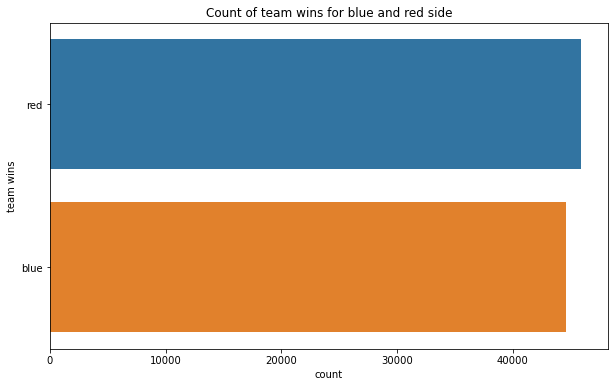

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['teamWins']).set_title('Count of team wins for blue and red side')
plt.ylabel('team wins')

Without other information, there is no much difference between the number of wins for two team. We can tell that game is fair for both side.

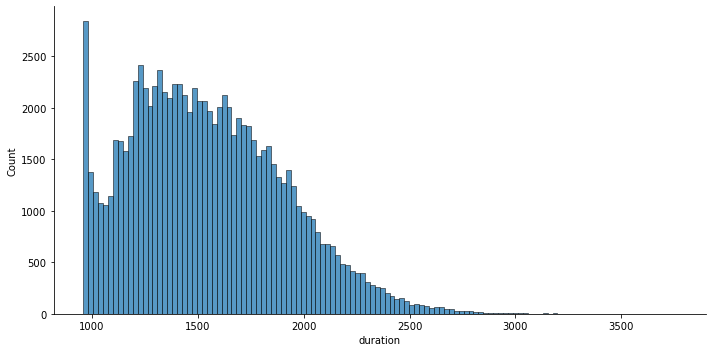

In [26]:
hisPlot1 = sns.displot(df, x='duration', aspect=2, palette='pastel')
hisPlot1

If a game's duration is more than about 1200s, the distribution looks similar to a normal distribution, but need further prove. But many games also end early(some of them are dropped as overliers, but we can still tell it from this plot).

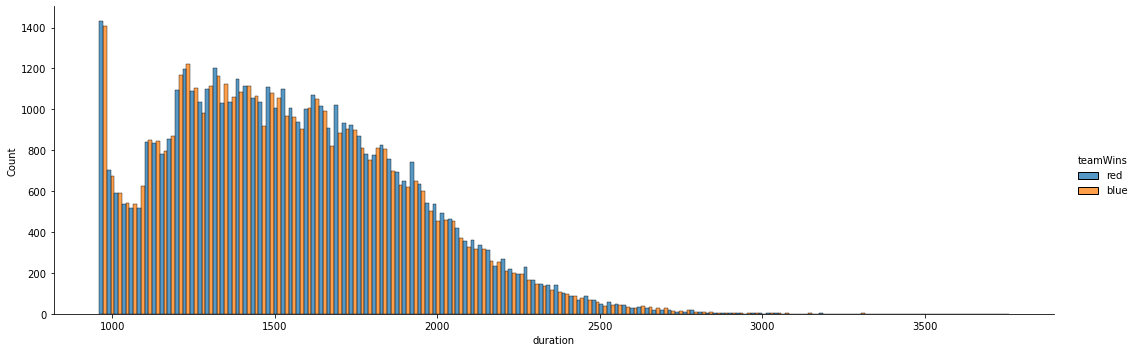

In [27]:
sns.displot(df, x="duration", hue="teamWins", multiple="dodge", aspect=3)

For any duration of the game, both teams seem to have about the same number of winnings.

Text(0, 0.5, 'team kills first Baron')

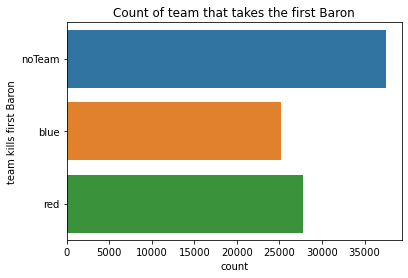

In [33]:
sns.countplot(y=df['teamFirstBaron']).set_title('Count of team that takes the first Baron')
plt.ylabel('team kills first Baron')

Many games end without a Baron get killed. We need to keep this in mind when we are doing further analysis.